In [4]:
sentence = "  Hello world this is the king of programmming   the programing king Dev Dev Shah, He is working in montezuma.ai firm   "

In [5]:
print(sentence.strip())

Hello world this is the king of programmming   the programing king Dev Dev Shah, He is working in montezuma.ai firm


In [6]:
print(sentence.lower())

  hello world this is the king of programmming   the programing king dev dev shah, he is working in montezuma.ai firm   


In [10]:
import nltk 
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from string  import punctuation

In [11]:
from nltk.corpus import stopwords
import string
token  = word_tokenize(sentence)
print("This is a tokenize sentence",token)
print("The vocab for the given sentence is ",sorted(set(token)))

vocab = sorted(set(token))
vocab_wo_stopwords = []
for word in vocab:
    if word not in stopwords.words('english'):
        vocab_wo_stopwords.append(word)
print("The vocab without stopwords is ", vocab_wo_stopwords)

vocab_wo_punct = []
for wordd in vocab_wo_stopwords:
    if wordd not in string.punctuation:
        vocab_wo_punct.append(wordd)
print("The vocab without punctuations is ", vocab_wo_punct)

This is a tokenize sentence ['Hello', 'world', 'this', 'is', 'the', 'king', 'of', 'programmming', 'the', 'programing', 'king', 'Dev', 'Dev', 'Shah', ',', 'He', 'is', 'working', 'in', 'montezuma.ai', 'firm']
The vocab for the given sentence is  [',', 'Dev', 'He', 'Hello', 'Shah', 'firm', 'in', 'is', 'king', 'montezuma.ai', 'of', 'programing', 'programmming', 'the', 'this', 'working', 'world']
The vocab without stopwords is  [',', 'Dev', 'He', 'Hello', 'Shah', 'firm', 'king', 'montezuma.ai', 'programing', 'programmming', 'working', 'world']
The vocab without punctuations is  ['Dev', 'He', 'Hello', 'Shah', 'firm', 'king', 'montezuma.ai', 'programing', 'programmming', 'working', 'world']


In [12]:
# Stemming 
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

ps = PorterStemmer()
example_words = ["python", "pythoner", "pythoning", "pythoned", "pythonly"]
for w in example_words:
    print(ps.stem(w))
    

python
python
python
python
pythonli


In [25]:
# Lemmatization
# Lemmatization is the process of converting a word to its base form. It removes inflectional endings and returns the base form of the word.
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
for i in ["cats","trouble","troubling","troubled","having","Corriendo","at","was","dogs","cat"]:
    print(lemmatizer.lemmatize(i))
    

cat
trouble
troubling
troubled
having
Corriendo
at
wa
dog
cat


In [43]:
from nltk import bigrams

bi_gram = list(bigrams(sentence.split()))
print(bi_gram)

[('Hello', 'world'), ('world', 'this'), ('this', 'is'), ('is', 'the'), ('the', 'king'), ('king', 'of'), ('of', 'programmming'), ('programmming', 'the'), ('the', 'programing'), ('programing', 'king'), ('king', 'Dev'), ('Dev', 'Dev'), ('Dev', 'Shah,'), ('Shah,', 'He'), ('He', 'is'), ('is', 'working'), ('working', 'in'), ('in', 'montezuma.ai'), ('montezuma.ai', 'firm')]


In [44]:
from nltk import pos_tag

pos = pos_tag(token)
print(pos)

[('Hello', 'NNP'), ('world', 'NN'), ('this', 'DT'), ('is', 'VBZ'), ('the', 'DT'), ('king', 'NN'), ('of', 'IN'), ('programmming', 'VBG'), ('the', 'DT'), ('programing', 'VBG'), ('king', 'NN'), ('Dev', 'NNP'), ('Dev', 'NNP'), ('Shah', 'NNP'), (',', ','), ('He', 'PRP'), ('is', 'VBZ'), ('working', 'VBG'), ('in', 'IN'), ('montezuma.ai', 'JJ'), ('firm', 'NN')]


In [51]:
#Minimum Edit distance 
def min_edit_distance(word1, word2):
    m = len(word1)
    n = len(word2)
    
    # Create a matrix to store the minimum edit distances
    dp = [[0] * (n + 1) for _ in range(m + 1)]
    
    # Initialize the matrix with base cases
    for i in range(m + 1):
        dp[i][0] = i
    for j in range(n + 1):
        dp[0][j] = j
    
    # Fill the matrix using dynamic programming
    for i in range(1, m + 1):
        for j in range(1, n + 1):
            if word1[i - 1] == word2[j - 1]:
                dp[i][j] = dp[i - 1][j - 1]  # no operation needed
            else:
                dp[i][j] = min(dp[i - 1][j - 1] + 2,  # substitution
                               dp[i - 1][j] + 1,      # deletion
                               dp[i][j - 1] + 1)      # insertion
    
    # The minimum edit distance is the value at the bottom-right corner of the matrix
    return dp[m][n]

# Example usage:
word1 = "INTENTION"
word2 = "EXECUTION"
print("Minimum edit distance between '{}' and '{}' is: {}".format(word1, word2, min_edit_distance(word1, word2)))


Minimum edit distance between 'INTENTION' and 'EXECUTION' is: 8


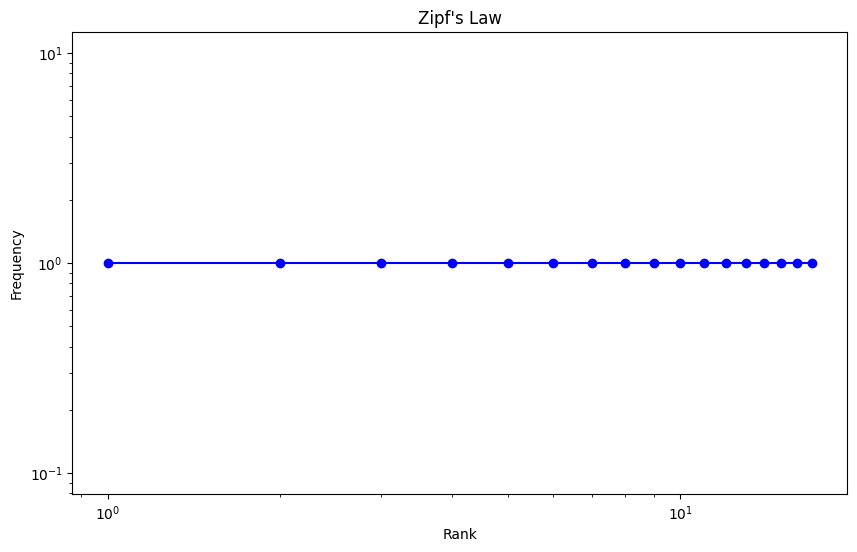

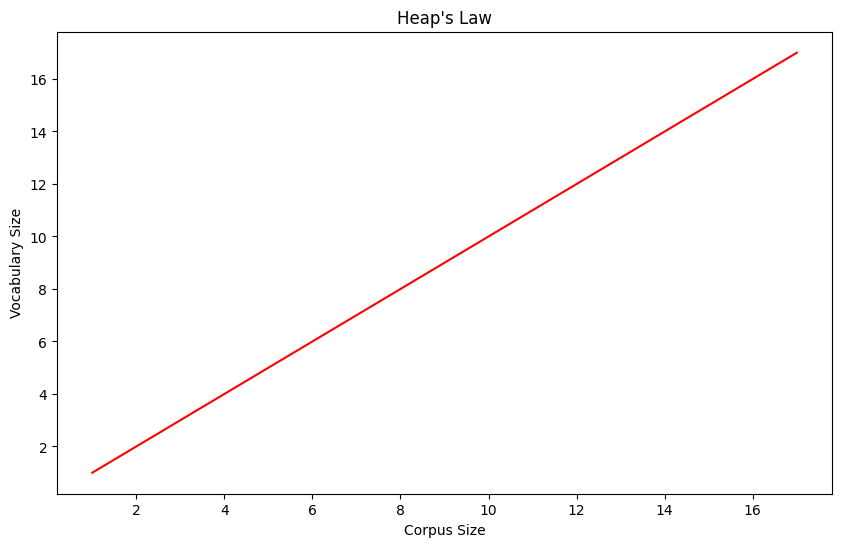

In [1]:
# Practical 4
# Zifp's law
import nltk
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
import numpy as np

def zipf_law(corpus):
    tokens = word_tokenize(corpus)
    freq_dist = nltk.FreqDist(tokens)
    ranks = list(range(1, len(freq_dist)+1))
    freqs = [freq_dist[word] for word in freq_dist]
    freqs_sorted = sorted(freqs, reverse=True)
    plt.figure(figsize=(10, 6))
    plt.plot(ranks, freqs_sorted, marker='o', linestyle='-', color='b')
    plt.title("Zipf's Law")
    plt.xlabel('Rank')
    plt.ylabel('Frequency')
    plt.xscale('log')
    plt.yscale('log')
    plt.show()

def heaps_law(corpus):
    tokens = word_tokenize(corpus)
    vocab = set()
    vocab_size = []
    corpus_size = []
    for i, token in enumerate(tokens):
        vocab.add(token)
        vocab_size.append(len(vocab))
        corpus_size.append(i+1)
    plt.figure(figsize=(10, 6))
    plt.plot(corpus_size, vocab_size, color='r')
    plt.title("Heap's Law")
    plt.xlabel('Corpus Size')
    plt.ylabel('Vocabulary Size')
    plt.show()

# Sample text corpus
corpus = "Hello world this is Dev Shah starting his studies for the NLP LAB exam today at 444"

zipf_law(corpus)
heaps_law(corpus)


In [7]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

def get_relation_matrix(documents, technique):
    if technique == "binary":
        vectorizer = CountVectorizer(binary=True)
    elif technique == "tf":
        vectorizer = CountVectorizer()
    elif technique == "tf-idf":
        vectorizer = TfidfVectorizer()
    else:
        raise ValueError("Invalid technique. Choose from 'binary', 'tf', or 'tf-idf'.")

    matrix = vectorizer.fit_transform(documents).toarray()
    return matrix

# Define the documents
documents = [
    "NLP is a theoretical subject",
    "NLP is interesting subject",
    "Solve the given problem"
]

# Allow the user to choose the bag-of-words technique
technique = input("Choose the bag-of-words technique (binary, tf, or tf-idf): ")

# Get the relation matrix
relation_matrix = get_relation_matrix(documents, technique)

# Compute the document similarity
similarity_matrix = cosine_similarity(relation_matrix)

# Display the similarity matrix
print("Similarity Matrix:")
print(similarity_matrix)


Similarity Matrix:
[[1.   0.75 0.  ]
 [0.75 1.   0.  ]
 [0.   0.   1.  ]]


In [ ]:
from textblob import TextBlob


data = 'I cannot help you with your homework as I would be late.'


def sentiment(data):
        blob = TextBlob(data)
        sentiment_op = blob.sentiment.polarity
        
        if sentiment_op >= 0.05:
            sentiment = 'Positive'
        elif sentiment_op <= -0.05:
            sentiment = 'Negative'
        else:
            sentiment = 'Neutral'

        print('The Sentimennt of text = ',sentiment)
        return sentiment

sentiment(data)

In [ ]:

import string
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer 
from nltk.stem import WordNetLemmatizer

nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')



data = "Virat Kohli is an Indian international cricketer and the former captain of the Indian national cricket team. He is a right-handed batsman and an occasional medium-fast bowler."



class preprocess():

    def __init__(self) -> None:
        pass

    def punctuation(self,data):
        res = re.sub(r'[^\w\s]','',data)
        print('Text with removed punctuation = ',res)
        return res
    
    def lowercasing(self,data):
        res = data.lower()
        print('The Text after lowercasing = ',res)
        return res

    def tokenize(self,data):
        res = nltk.word_tokenize(data)
        print('The Text after Tokenizing = ',res)
        return res
    
    def stopwords(self,data):
        res = []
        stop_words = set(stopwords.words('english'))
        for w in data:
            if w not in stop_words:
                res.append(w)
        print('The text after removing stopwords',res)
        return res

    def stemmer(self,data):
        res = []
        stemmer = PorterStemmer()
        for w in data:
            res.append(stemmer.stem(w))
        print('The text after Stemming',res)
        return res
    
    def limitizer(self,data):
        lemmatizer = WordNetLemmatizer()
        res = []
        for w in data:
            res.append(lemmatizer.lemmatize(w))
        print('The text after Lemetizing',res)

        return res


if __name__ == "__main__":
    demo = preprocess()
    punctuation = demo.punctuation(data)
    lowercase = demo.lowercasing(punctuation)
    Tokenize = demo.tokenize(lowercase)
    Stopwords = demo.stopwords(Tokenize)
    Stemming = demo.stemmer(Stopwords)
    Lemetizer = demo.limitizer(Stopwords)





